In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# K-Means

In [2]:
df = pd.read_csv('Book1.csv', sep=';')
df.head()

,Nama,Alamat,x,y
0,Andi,Jl. Apel,1,2
1,Bagus,Jl. Buaya,3,1
2,Cici,Jl. Cendrawasih,8,1
3,Deni,Jl. Durian Runtuh,4,4
4,Eka,Jl. Epsilon,4,6


Text(0, 0.5, 'y')

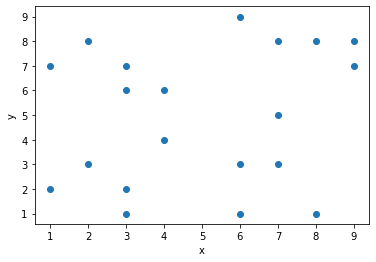

In [3]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')

In [4]:
'''scaler = MinMaxScaler()

scaler.fit(df[['y']])
df['y'] = scaler.transform(df[['y']])

scaler.fit(df[['x']])
df['x'] = scaler.transform(df[['x']])
df.head()'''

"scaler = MinMaxScaler()\n\nscaler.fit(df[['y']])\ndf['y'] = scaler.transform(df[['y']])\n\nscaler.fit(df[['x']])\ndf['x'] = scaler.transform(df[['x']])\ndf.head()"

In [5]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([0, 0, 2, 0, 3, 3, 3, 3, 2, 1, 1, 2, 3, 1, 0, 2, 0, 2, 1, 1])

In [6]:
df['cluster']=y_predicted
df.head()

,Nama,Alamat,x,y,cluster
0,Andi,Jl. Apel,1,2,0
1,Bagus,Jl. Buaya,3,1,0
2,Cici,Jl. Cendrawasih,8,1,2
3,Deni,Jl. Durian Runtuh,4,4,0
4,Eka,Jl. Epsilon,4,6,3


In [7]:
km.cluster_centers_

array([[2.6, 2.4],
       [7.8, 8. ],
       [6.8, 2.6],
       [2.6, 6.8]])

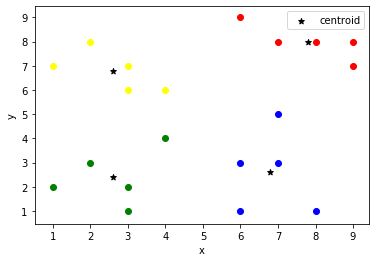

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['x'],df1['y'],color='green')
plt.scatter(df2['x'],df2['y'],color='red')
plt.scatter(df3['x'],df3['y'],color='blue')
plt.scatter(df4['x'],df4['y'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Genetic Algorithm

In [9]:
df_cluster0 = df[df['cluster']==0][['x', 'y']]
df_cluster1 = df[df['cluster']==1][['x', 'y']]
df_cluster2 = df[df['cluster']==2][['x', 'y']]
df_cluster3 = df[df['cluster']==3][['x', 'y']]

loc_office = {'x':5, 'y':5}
df_cluster0 = df_cluster0.append(loc_office, ignore_index=True)
df_cluster1 = df_cluster1.append(loc_office, ignore_index=True)
df_cluster2 = df_cluster2.append(loc_office, ignore_index=True)
df_cluster3 = df_cluster3.append(loc_office, ignore_index=True)

df_cluster0

,x,y
0,1,2
1,3,1
2,4,4
3,3,2
4,2,3
5,5,5


In [10]:
x = np.array(df_cluster0['x'].values)
y = np.array(df_cluster0['y'].values)

print(x)
print(y)

[1 3 4 3 2 5]
[2 1 4 2 3 5]


In [11]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 20

# maximum generation
N = 100

In [12]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[0, 2, 3, 2, 1, 5],
       [2, 0, 3, 1, 2, 4],
       [3, 3, 0, 2, 2, 1],
       [2, 1, 2, 0, 1, 3],
       [1, 2, 2, 1, 0, 3],
       [5, 4, 1, 3, 3, 0]])

In [13]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [14]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [15]:
def randomSelection(m):
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [16]:
def crossover(pop):
    popc = pop.copy()
    
    for i in range(n):
        a, b = randomSelection(m)    #ambil random index untuk pertukaran gen
        s = min(a, b) 
        t = max(a, b)
        
        x, y = randomSelection(n)    #ambil random kromosom 
        temp1 = list(pop.loc[x][s:t+1])
        temp2 = []
        for val in pop.loc[y]:
             if val not in temp1:
                temp2 += [val]
        temp1 += temp2
        
        popc.loc[i] = temp1
    return popc

In [17]:
def mutation(popc):
    popm = popc.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [18]:
def combinePopulation(pop, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [19]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [20]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [21]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solusi pada populasi awal
   0  1  2  3  4  5  fitness
0  0  2  4  1  5  3       16


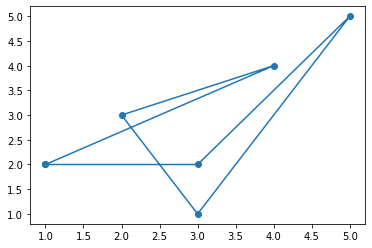

ValueError: cannot copy sequence with size 8 to array axis with dimension 7

In [22]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    if i % 10 == 0:
        print()
        print('Solusi terbaik pada populasi generasi ke-'+ str(i))
        print(pop.head(1))
        plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)